# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

In [29]:
!pwd

/content


In [30]:
import torchvision
from torch import optim
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.CIFAR10(root='/content/sample_data',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

Files already downloaded and verified


In [31]:
import torch

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [32]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [33]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

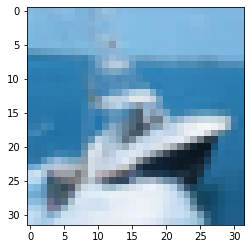

In [34]:
import matplotlib.pyplot as plt

image, label = train_dataset[8]
plt.imshow(image.permute(1, 2, 0).numpy());

a) Начнем с изменения слоёв и их количества;

уменьшим количество слоёв до 3-х и уменьшим количество нейронов

In [44]:
from torch import nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,  hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        return x

net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [45]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs.squeeze(), labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.036
Epoch [2/5]. Step [1/782]. Loss: 0.036
Epoch [2/5]. Step [301/782]. Loss: 0.036
Epoch [2/5]. Step [601/782]. Loss: 0.036
Epoch [3/5]. Step [1/782]. Loss: 0.036
Epoch [3/5]. Step [301/782]. Loss: 0.036
Epoch [3/5]. Step [601/782]. Loss: 0.036
Epoch [4/5]. Step [1/782]. Loss: 0.036
Epoch [4/5]. Step [301/782]. Loss: 0.036
Epoch [4/5]. Step [601/782]. Loss: 0.036
Epoch [5/5]. Step [1/782]. Loss: 0.036
Epoch [5/5]. Step [301/782]. Loss: 0.036
Epoch [5/5]. Step [601/782]. Loss: 0.036
Training is finished!


Обучение вообще не происходит

Я перепробовал кучу вариантов, с увеличением слоев, но это не улучшало метрику. 4 слоя выглядят оптимальными.

Чтобы не забивать ноутбук всеми своими экспериментами, выкладываю ниже только модель, которая выполнила поставленную задачу. 
Это 4 линейных слоя  с тем же количеством нейронов, что и у модели на уроке, но в качестве оптимизатора использован Адам с lr=0.005, обучалась модель на 10 эпохах.

In [108]:
from torch import nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim,  2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x

net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [110]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs.squeeze(), labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1/782]. Loss: 0.036
Epoch [1/10]. Step [301/782]. Loss: 0.033
Epoch [1/10]. Step [601/782]. Loss: 0.030
Epoch [2/10]. Step [1/782]. Loss: 0.039
Epoch [2/10]. Step [301/782]. Loss: 0.030
Epoch [2/10]. Step [601/782]. Loss: 0.029
Epoch [3/10]. Step [1/782]. Loss: 0.025
Epoch [3/10]. Step [301/782]. Loss: 0.028
Epoch [3/10]. Step [601/782]. Loss: 0.027
Epoch [4/10]. Step [1/782]. Loss: 0.029
Epoch [4/10]. Step [301/782]. Loss: 0.027
Epoch [4/10]. Step [601/782]. Loss: 0.027
Epoch [5/10]. Step [1/782]. Loss: 0.030
Epoch [5/10]. Step [301/782]. Loss: 0.026
Epoch [5/10]. Step [601/782]. Loss: 0.027
Epoch [6/10]. Step [1/782]. Loss: 0.028
Epoch [6/10]. Step [301/782]. Loss: 0.026
Epoch [6/10]. Step [601/782]. Loss: 0.026
Epoch [7/10]. Step [1/782]. Loss: 0.026
Epoch [7/10]. Step [301/782]. Loss: 0.025
Epoch [7/10]. Step [601/782]. Loss: 0.025
Epoch [8/10]. Step [1/782]. Loss: 0.028
Epoch [8/10]. Step [301/782]. Loss: 0.025
Epoch [8/10]. Step [601/782]. Loss: 0.025
Epoch [9

In [111]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog


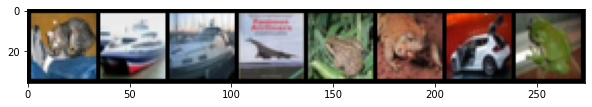

In [112]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [113]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([8, 8, 8, 0, 4, 6, 3, 6])

In [114]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  ship ship ship plane deer frog cat frog


In [115]:
import numpy as np

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['ship' 'ship' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog']
Accuracy is 0.625


Поставленная задача выполнена. 5 из 8 картинок модель классифицировала корректно